In [64]:
import pandas as pd
import geopandas as gpd
import sys
sys.path.append('../')
import utils.geo as areal
                   

In [17]:

stops = gpd.read_file('/home/data/test/cities/nola/stops.geojson')

In [12]:
fsf.head()

,fips,count_property,count_floodfactor1,count_floodfactor2,count_floodfactor3,count_floodfactor4,count_floodfactor5,count_floodfactor6,count_floodfactor7,count_floodfactor8,count_floodfactor9,count_floodfactor10
0,1001020100,941,703,5,13,5,5,26,23,63,84,14
1,1001020200,1131,808,4,17,12,36,107,53,64,30,0
2,1001020300,1482,1348,2,12,12,13,24,20,26,19,6
3,1001020400,1887,1673,6,15,8,23,25,34,60,37,6
4,1001020501,1596,1526,3,8,2,7,18,13,12,5,2


In [14]:
stops.head()

,id,GEOID_2010,GEOID_2020,city,feed_name,route_type,routes_serviced,stop_id,stop_lat,stop_lon,stop_name,geometry
0,0,22071005500,22071005500,nola,norta,Bus,91,1670,29.983590,-90.110520,Cemeteries (Bus),POINT (-90.11052 29.98359)
1,1,22071005500,22071005500,nola,norta,Bus,"27,E1,91",51,29.984199,-90.103272,City Park at St Peter,POINT (-90.10327 29.98420)
2,2,22071005500,22071005500,nola,norta,Bus,"27,E1,91",52,29.983718,-90.105686,City Park at St Louis,POINT (-90.10569 29.98372)
3,3,22071005500,22071005500,nola,norta,Bus,"27,E1,91",53,29.982873,-90.108660,City Park at Bienville,POINT (-90.10866 29.98287)
4,4,22071005500,22071005500,nola,norta,Bus,27,2411,29.988936,-90.102235,Orleans at Navarre,POINT (-90.10223 29.98894)


In [38]:
fsf = pd.read_csv('/home/data/test/national/fsf_flood_tract_summary.csv')
fsf["GEOID"] = fsf["fips"].astype(str).str.zfill(11)
fsf = fsf.drop("fips", axis = 1)

fsf[['count_floodfactor1', 'count_floodfactor2',
  'count_floodfactor3', 'count_floodfactor4', 'count_floodfactor5',
  'count_floodfactor6', 'count_floodfactor7', 'count_floodfactor8',
  'count_floodfactor9', 'count_floodfactor10']] = fsf[['count_floodfactor1', 'count_floodfactor2',
  'count_floodfactor3', 'count_floodfactor4', 'count_floodfactor5',
  'count_floodfactor6', 'count_floodfactor7', 'count_floodfactor8',
  'count_floodfactor9', 'count_floodfactor10']].div(fsf.count_property, axis=0)

fsf['pct_minor'] = fsf['count_floodfactor1'] + fsf['count_floodfactor2']
fsf['pct_moderate'] = fsf['count_floodfactor3'] + fsf['count_floodfactor4']
fsf['pct_major'] = fsf['count_floodfactor5'] + fsf['count_floodfactor6']
fsf['pct_severe'] = fsf['count_floodfactor7'] + fsf['count_floodfactor8']
fsf['pct_extreme'] = fsf['count_floodfactor9'] + fsf['count_floodfactor10']

fsf_sum = fsf[['GEOID','count_floodfactor1', 'count_floodfactor2',
  'count_floodfactor3', 'count_floodfactor4', 'count_floodfactor5',
  'count_floodfactor6', 'count_floodfactor7', 'count_floodfactor8',
  'count_floodfactor9', 'count_floodfactor10']].copy(deep=True)

fsf = fsf.drop(columns=['count_floodfactor1', 'count_floodfactor2',
  'count_floodfactor3', 'count_floodfactor4', 'count_floodfactor5',
  'count_floodfactor6', 'count_floodfactor7', 'count_floodfactor8',
  'count_floodfactor9', 'count_floodfactor10'])

fsf_sum = pd.wide_to_long(fsf_sum, stubnames='count_floodfactor', i='GEOID', j='risk').reset_index()
fsf_sum['risk_score'] = fsf_sum['risk']*fsf_sum['count_floodfactor']
fsf_sum = fsf_sum.groupby('GEOID').sum().reset_index()

fsf = fsf.merge(fsf_sum[['GEOID','risk_score']], how='left', on='GEOID')

fsf["pct_moderate_plus"] = fsf["pct_moderate"] + fsf["pct_major"] + fsf["pct_severe"] + fsf["pct_extreme"]
fsf["pct_moderate_plus"] = fsf["pct_moderate_plus"].fillna(0)


In [39]:
fsf

,count_property,GEOID,pct_minor,pct_moderate,pct_major,pct_severe,pct_extreme,risk_score,pct_moderate_plus
0,941,01001020100,0.752391,0.019129,0.032944,0.091392,0.104145,2.671626,0.247609
1,1131,01001020200,0.717949,0.025641,0.126437,0.103448,0.026525,2.555261,0.282051
2,1482,01001020300,0.910931,0.016194,0.024966,0.031039,0.016869,1.500675,0.089069
3,1887,01001020400,0.889772,0.012189,0.025437,0.049815,0.022787,1.662957,0.110228
4,1596,01001020501,0.958020,0.006266,0.015664,0.015664,0.004386,1.227444,0.041980
...,...,...,...,...,...,...,...,...,...
84779,2311,56043000200,0.804414,0.041108,0.052791,0.048031,0.053656,2.125054,0.195586
84780,1299,56043000301,0.881447,0.118553,0.000000,0.000000,0.000000,1.326405,0.118553
84781,1365,56043000302,0.695971,0.161905,0.099634,0.034432,0.008059,2.191941,0.304029
84782,3663,56045951100,0.896260,0.015561,0.021840,0.029484,0.036855,1.649741,0.103740


In [40]:
import numpy as np

In [41]:
np.corrcoef(fsf.risk_score,fsf.pct_moderate_plus)

array([[1.        , 0.94671502],
       [0.94671502, 1.        ]])

In [43]:
nola_fsf = stops.merge(fsf[['GEOID','risk_score','pct_moderate_plus']],how='left',
                        left_on = "GEOID_2020", right_on = "GEOID")

In [45]:
nola_fsf[['risk_score','pct_moderate_plus']].describe()

,risk_score,pct_moderate_plus
count,2117.000000,2117.000000
mean,8.152403,0.999074
std,0.537886,0.009456
min,5.194517,0.579634
25%,7.955314,1.000000
50%,8.057143,1.000000
75%,8.526615,1.000000
max,9.427147,1.000000


In [46]:
nola_fsf['risk_category'] = pd.qcut(nola_fsf['risk_score'],3,labels=False, duplicates='drop')

In [47]:
nola_fsf.risk_category.value_counts()

0.0    778
2.0    705
1.0    634
Name: risk_category, dtype: int64

## SF SVI issue

In [51]:
sf_stops = gpd.read_file('/home/data/test/cities/sf/stops.geojson')
LODES_path = '/home/data/test/cities/sf/census/LODES/CA_od_main_JT01_2019.csv'
SVI_path = '/home/data/test/national/SVI2020_US.csv'
census_geo_path = '/home/data/test/cities/sf/census/geo/tracts_2010.geojson'
polygon_path = '/home/data/test/cities/sf/osm/walksheds/transit_walkshed.geojson'
crs='epsg:4326'
polygon_id = 'id'

walksheds = gpd.read_file(polygon_path)
lodes = pd.read_csv(LODES_path)
tracts = gpd.read_file(census_geo_path)
tracts = tracts.drop_duplicates()



In [87]:
svi = pd.read_csv(SVI_path,dtype={'FIPS':str})

In [81]:
lodes = pd.read_csv(LODES_path,dtype={'w_geocode':str,'h_geocode':str})


In [80]:
lodes.head()

,w_geocode,h_geocode,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03,createdate
0,060014001001007,060014001001044,1,0,0,1,0,0,1,0,0,1,20211018
1,060014001001007,060014001001060,1,0,0,1,0,0,1,0,0,1,20211018
2,060014001001007,060014038002002,1,1,0,0,1,0,0,0,0,1,20211018
3,060014001001007,060014041021003,1,0,1,0,0,0,1,0,0,1,20211018
4,060014001001007,060014042002012,1,0,0,1,0,1,0,0,0,1,20211018


<AxesSubplot:>

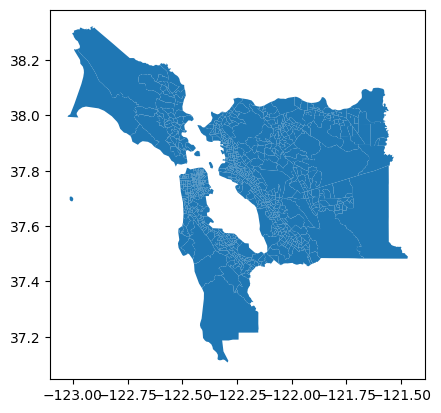

In [52]:
tracts.plot()

In [53]:
walksheds.head()

,GEOID_2010,GEOID_2020,city,feed_name,highway,id,index_right,osmid,ref,route_type,routes_serviced,stop_id,stop_lat,stop_lon,stop_name,street_count,x,y,geometry
0,06001450101,06001450101,sf,sf_mta,NaN,0,365354,657540257,NaN,Bus,"WH:20X,WH:3,WH:70X,WH:30R,WH:10R,WH:1,WH:8",882846,37.702923,-121.899419,East Dublin BART Station,3,-121.899134,37.702441,"POLYGON ((-121.89823 37.69729, -121.90109 37.6..."
1,06001450101,06001450101,sf,sf_mta,NaN,1,415105,10294422176,NaN,Bus,"WH:30R,WH:504",880103,37.705802,-121.875028,Dublin Blvd & Tassajara Rd,3,-121.874895,37.705812,"POLYGON ((-121.87281 37.69843, -121.87295 37.6..."
2,06001450101,06001450101,sf,sf_mta,turning_circle,2,363398,401488183,NaN,Bus,"WH:30R,WH:504",881757,37.706187,-121.881403,Dublin Blvd & Myrtle Dr,1,-121.881196,37.706311,"POLYGON ((-121.88217 37.70201, -121.88288 37.7..."
3,06001450101,06001450101,sf,sf_mta,NaN,3,415396,10300167843,NaN,Bus,"WH:501,WH:30R,WH:502,WH:1,WH:504",882143,37.706432,-121.888567,Dublin Blvd & Hacienda Dr,1,-121.888363,37.706458,"POLYGON ((-121.88867 37.69720, -121.88945 37.6..."
4,06001450101,06001450101,sf,sf_mta,NaN,4,413269,10204476396,NaN,Bus,"WH:30R,WH:504",882876,37.70605,-121.887009,Dublin Blvd & Hacienda Dr,3,-121.886811,37.706043,"POLYGON ((-121.88867 37.69720, -121.88945 37.6..."


In [54]:
def prep_SVI(SVI): 
    """Drops unneed columns and replaces missing values with median for SVI scores"""
    
    SVI = SVI[["FIPS", "SPL_THEMES", "SPL_THEME1", "SPL_THEME2", "SPL_THEME3", "SPL_THEME4"]]
    
    # Set missing values (coded -999) to median - could be improved by setting to regional medians but not a big deal because there aren't that many
    ## TO DO set as NA
    SVI.loc[SVI.SPL_THEMES < 0, "SPL_THEMES"] = np.median(SVI.SPL_THEMES)
    SVI.loc[SVI.SPL_THEME1 < 0, "SPL_THEME1"] = np.median(SVI.SPL_THEME1)
    SVI.loc[SVI.SPL_THEME2 < 0, "SPL_THEME2"] = np.median(SVI.SPL_THEME2)
    SVI.loc[SVI.SPL_THEME3 < 0, "SPL_THEME3"] = np.median(SVI.SPL_THEME3)
    SVI.loc[SVI.SPL_THEME4 < 0, "SPL_THEME4"] = np.median(SVI.SPL_THEME4)
    
    return SVI


def prep_geo(census_geo, polygons, crs): 
    """Standardizes crs between polygons, census tracts, and adds needed area value to census data"""
    
    census_geo = census_geo.to_crs(crs)
    polygons = polygons.to_crs(crs)
    
    census_geo = areal.calculate_census_areas(census_geo)
    
    return census_geo, polygons

def aggregate_LODES_at_tract(LODES):
    """Groups LODES data by tract rather than block so it can be merged with SVI data"""
    
    LODES["w_GEOID"] = LODES["w_geocode"].astype(str).str.slice(start = 0, stop = 11)
    LODES["h_GEOID"] = LODES["h_geocode"].astype(str).str.slice(start = 0, stop = 11)
    
    return LODES.groupby(["w_GEOID", "h_GEOID"]).agg(total_jobs = ("S000", "sum")).reset_index()

def polygons_to_home_tracts(polygons, census_geo, LODES_tract, crs, polygon_id):
    """"""
    
    intersection_weights = areal.calculate_areal_weights(polygons, census_geo, polygon_id)
    print(intersection_weights.dtypes)
    print(LODES_tract.dtypes)
    
    LODES_weights = LODES_tract.merge(intersection_weights, how='left', left_on = "w_GEOID", right_on = "GEOID")
    print(LODES_weights.shape)
    LODES_weights = LODES_weights[LODES_weights[polygon_id].notna()]
    print(LODES_weights.shape)
    LODES_weights["jobs_interpolated"] = LODES_weights["intersection_weight"] * LODES_weights["total_jobs"]
    print(LODES_weights.shape)
    # Groups home tracts by polygon and sums up jobs in each tract, accounting for areal weights defined at the work tract level
    polygon_home_tracts = (LODES_weights
                           .groupby([polygon_id, "h_GEOID"])
                           .agg(jobs_interpolated = ("jobs_interpolated", "sum"))
                           .reset_index())
    
    return polygon_home_tracts


def polygon_SVI_weights(polygon_home_tracts, svi, polygon_id): 
    """Takes output of polygons_to_home_tracts() and joins to SVI, then calculates weights for aggregation"""
    svi['FIPS'] = svi['FIPS'].astype(str)
    polygons_SVI = polygon_home_tracts.merge(svi, left_on = "h_GEOID", right_on = "FIPS")
    
    polygon_denoms = polygons_SVI.groupby(polygon_id).agg(job_weight_denom = ("jobs_interpolated", "sum")).reset_index()
    polygons_SVI = polygon_denoms.merge(polygons_SVI)
    
    # All weights add up to 1 within groups to make it easy to calculate weighted mean
    polygons_SVI["jobs_weight"] = polygons_SVI["jobs_interpolated"] / polygons_SVI["job_weight_denom"] 
    
    return polygons_SVI

def aggregate_SVI_to_polygons(polygons_SVI, polygon_id):
    """Uses weights to calculate weighted means for each SVI measure and output final dataset"""
    
    polygons_SVI["SPL_THEMES_weight"] = polygons_SVI["SPL_THEMES"] * polygons_SVI["jobs_weight"]
    polygons_SVI["SPL_THEME1_weight"] = polygons_SVI["SPL_THEME1"] * polygons_SVI["jobs_weight"]
    polygons_SVI["SPL_THEME2_weight"] = polygons_SVI["SPL_THEME2"] * polygons_SVI["jobs_weight"]
    polygons_SVI["SPL_THEME3_weight"] = polygons_SVI["SPL_THEME3"] * polygons_SVI["jobs_weight"]
    polygons_SVI["SPL_THEME4_weight"] = polygons_SVI["SPL_THEME4"] * polygons_SVI["jobs_weight"]
    
    out = polygons_SVI.groupby(polygon_id).agg(SVI_total = ("SPL_THEMES_weight", "sum"),
                                    SVI_SES = ("SPL_THEME1_weight", "sum"),
                                    SVI_household = ("SPL_THEME2_weight", "sum"),
                                    SVI_race = ("SPL_THEME3_weight", "sum"),
                                    SVI_housing_transport = ("SPL_THEME4_weight", "sum")).reset_index()
    
    return out

In [86]:
svi.dtypes

FIPS           object
SPL_THEMES    float64
SPL_THEME1    float64
SPL_THEME2    float64
SPL_THEME3    float64
SPL_THEME4    float64
dtype: object

In [88]:
svi = prep_SVI(svi)
print(svi.shape)
print("prep LODES")
LODES_tract = aggregate_LODES_at_tract(lodes)
print(LODES_tract.shape)
print("prep census")

print("get interpolated jobs")
polygon_home_tracts = polygons_to_home_tracts(polygons, census_geo, LODES_tract, crs, 'stop_id')
print(polygon_home_tracts.shape)
print("merge SVI")
polygons_SVI = polygon_SVI_weights(polygon_home_tracts, svi, 'stop_id')
print(polygons_SVI.shape)
print("aggregate SVI")
out = aggregate_SVI_to_polygons(polygons_SVI, 'stop_id')
print(out.shape)

/home/kaushik/.local/share/virtualenvs/TOP-Sprint-3W2iZMR3/lib64/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


(84122, 6)
prep LODES
(4871718, 3)
prep census
get interpolated jobs


../utils/geo.py:63: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  intersected_polygons["intersection_area"] = intersected_polygons.area


stop_id                 object
GEOID                   object
intersection_weight    float64
dtype: object
w_GEOID       object
h_GEOID       object
total_jobs     int64
dtype: object
(78936841, 6)
(74696824, 6)
(74696824, 7)
(32509488, 3)
merge SVI
(27393974, 11)
aggregate SVI
(12793, 6)


In [65]:
census_geo, polygons = prep_geo(tracts, walksheds, crs)
print(census_geo.shape)


(980, 5)


../utils/geo.py:41: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  census_geo["census_area"] = census_geo.area


In [74]:
census_geo.county.unique()

array(['06001', '06013', '06041', '06075', '06081'], dtype=object)

In [67]:
polygons

,GEOID_2010,GEOID_2020,city,feed_name,highway,id,index_right,osmid,ref,route_type,routes_serviced,stop_id,stop_lat,stop_lon,stop_name,street_count,x,y,geometry
0,06001450101,06001450101,sf,sf_mta,NaN,0,365354,657540257,NaN,Bus,"WH:20X,WH:3,WH:70X,WH:30R,WH:10R,WH:1,WH:8",882846,37.702923,-121.899419,East Dublin BART Station,3,-121.899134,37.702441,"POLYGON ((-121.89823 37.69729, -121.90109 37.6..."
1,06001450101,06001450101,sf,sf_mta,NaN,1,415105,10294422176,NaN,Bus,"WH:30R,WH:504",880103,37.705802,-121.875028,Dublin Blvd & Tassajara Rd,3,-121.874895,37.705812,"POLYGON ((-121.87281 37.69843, -121.87295 37.6..."
2,06001450101,06001450101,sf,sf_mta,turning_circle,2,363398,401488183,NaN,Bus,"WH:30R,WH:504",881757,37.706187,-121.881403,Dublin Blvd & Myrtle Dr,1,-121.881196,37.706311,"POLYGON ((-121.88217 37.70201, -121.88288 37.7..."
3,06001450101,06001450101,sf,sf_mta,NaN,3,415396,10300167843,NaN,Bus,"WH:501,WH:30R,WH:502,WH:1,WH:504",882143,37.706432,-121.888567,Dublin Blvd & Hacienda Dr,1,-121.888363,37.706458,"POLYGON ((-121.88867 37.69720, -121.88945 37.6..."
4,06001450101,06001450101,sf,sf_mta,NaN,4,413269,10204476396,NaN,Bus,"WH:30R,WH:504",882876,37.70605,-121.887009,Dublin Blvd & Hacienda Dr,3,-121.886811,37.706043,"POLYGON ((-121.88867 37.69720, -121.88945 37.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12788,06013376000,06013376000,sf,sf_mta,NaN,9802,290959,3100977369,NaN,Bus,AC:71,53580,37.938306,-122.359384,Barrett Av & Harbour Way,1,-122.358982,37.938195,"POLYGON ((-122.35803 37.92702, -122.35828 37.9..."
12789,06001401700,06001401700,sf,sf_mta,NaN,9941,218778,6612415914,NaN,Bus,"AC:O,AC:OX,AC:W,AC:NL",56925,37.823222,-122.31535,I-80 Fwy & Toll Plaza (East Bound),1,-122.315356,37.823202,"POLYGON ((-122.31945 37.81291, -122.32294 37.8..."
12790,06001441522,06001441522,sf,sf_mta,NaN,10776,196707,5485934217,NaN,Bus,AC:210,51192,37.585757,-122.062161,Alvarado Blvd & Lake Arrowhead Av,1,-122.062339,37.585285,"POLYGON ((-122.06183 37.57413, -122.06483 37.5..."
12791,06001422300,06001422300,sf,sf_mta,NaN,11803,266062,10226310569,NaN,Bus,AC:52,50604,37.87333,-122.282152,Sacramento St & Delaware St (North Berkeley BART),1,-122.282132,37.873354,"POLYGON ((-122.28120 37.86219, -122.28553 37.8..."


In [68]:
intersection_weights = areal.calculate_areal_weights(polygons, census_geo, 'stop_id')
print(intersection_weights.dtypes)
print(LODES_tract.dtypes)


stop_id                 object
GEOID                   object
intersection_weight    float64
dtype: object
w_GEOID       object
h_GEOID       object
total_jobs     int64
dtype: object


../utils/geo.py:63: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  intersected_polygons["intersection_area"] = intersected_polygons.area


In [71]:
intersection_weights.head()

,stop_id,GEOID,intersection_weight
0,882846,06001450101,0.263725
1,880103,06001450101,0.506137
2,881757,06001450101,0.502535
3,882143,06001450101,0.689209
4,882876,06001450101,0.718625


In [72]:
LODES_tract.head()

,w_GEOID,h_GEOID,total_jobs
0,60014001001,60014001001,22
1,60014001001,60014003003,2
2,60014001001,60014003004,2
3,60014001001,60014004001,3
4,60014001001,60014004002,4


In [69]:
LODES_weights = LODES_tract.merge(intersection_weights, how='left', left_on = "w_GEOID", right_on = "GEOID")
print(LODES_weights.shape)


(8132543, 6)


In [70]:
LODES_weights.head()

,w_GEOID,h_GEOID,total_jobs,stop_id,GEOID,intersection_weight
0,60014001001,60014001001,22,NaN,NaN,NaN
1,60014001001,60014003003,2,NaN,NaN,NaN
2,60014001001,60014003004,2,NaN,NaN,NaN
3,60014001001,60014004001,3,NaN,NaN,NaN
4,60014001001,60014004002,4,NaN,NaN,NaN


In [ ]:
LODES_weights = LODES_weights[LODES_weights[polygon_id].notna()]
print(LODES_weights.shape)
LODES_weights["jobs_interpolated"] = LODES_weights["intersection_weight"] * LODES_weights["total_jobs"]
print(LODES_weights.shape)
# Groups home tracts by polygon and sums up jobs in each tract, accounting for areal weights defined at the work tract level
polygon_home_tracts = (LODES_weights
                       .groupby([polygon_id, "h_GEOID"])
                       .agg(jobs_interpolated = ("jobs_interpolated", "sum"))
                       .reset_index())